## Question 1

Using the stagec dataset from the rpart package in R, find the Gleason score of oldest patient.

In [2]:
using RDatasets
stagec = dataset("rpart", "stagec")

,PgTime,PgStat,Age,EET,G2,Grade,Gleason,Ploidy
1,6.1,0,64,2,10.26,2,4,diploid
2,9.4,0,62,1,NA,3,8,aneuploid
3,5.2,1,59,2,9.99,3,7,diploid
4,3.2,1,62,2,3.57,2,4,diploid
5,1.9,1,64,2,22.56,4,8,tetraploid
6,4.8,0,69,1,6.14,3,7,diploid
7,5.8,0,75,2,13.69,2,NA,tetraploid
8,7.3,0,71,2,NA,3,7,aneuploid
9,3.7,1,73,2,11.77,3,6,diploid
10,15.9,0,64,2,27.27,3,7,tetraploid


In [3]:
maxage = maximum(stagec[:Age])   

is_oldest = stagec[:Age] .== maxage 
stagec[is_oldest, :Gleason]

2-element DataArrays.DataArray{Int32,1}:
  NA
 7  

---

# Question 2

Using the stagec dataset from above, determine if patients with tetraploidy tumors have higher Gleason scores than patients with diploid tumors.

In [4]:
using RDatasets
using HypothesisTests

stagec = dataset("rpart", "stagec")

# get row indices
tetra_idx = find(stagec[:Ploidy] .== "tetraploid");
dip_idx = find(stagec[:Ploidy] .== "diploid");

# get Gleason scores
tetra_grp = stagec[tetra_idx, :Gleason];
dip_grp = stagec[dip_idx, :Gleason];

EqualVarianceTTest(dropna(tetra_grp), dropna(dip_grp))

Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          0.7033295063145806
    95% confidence interval: (0.2520598786091346,1.1545991340200266)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0024996266792327855 (very significant)

Details:
    number of observations:   [67,65]
    t-statistic:              3.083418932802007
    degrees of freedom:       130
    empirical standard error: 0.22810053438811873


---

## Question 3

Option 1: Create a box-and-whisker plot of the two groups' data described in Question 2 above. 

Option 2: Create a plot of the distributions of the two groups' data described in Question 2.

In [16]:
using Plots
using RDatasets

pyplot()

Plots.PyPlotBackend()


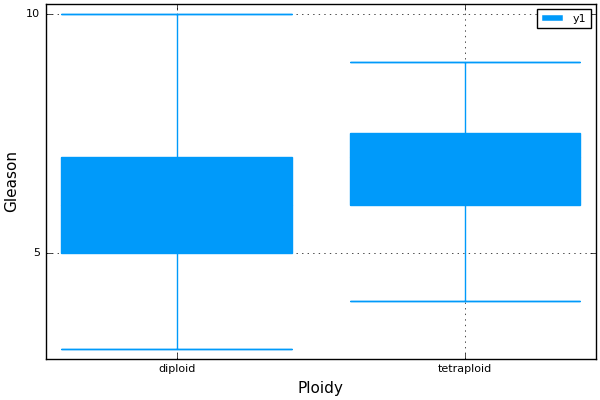

In [4]:
using RDatasets
using StatPlots

stagec = dataset("rpart", "stagec")

# Need to remove NA and by Ploidy type
filtered_stagec = stagec[((stagec[:Ploidy] .== "diploid") | (stagec[:Ploidy].=="tetraploid")) & !isna(stagec[:Gleason]), :]

# Boxplot seems to work with dataframes this way
boxplot(filtered_stagec,:Ploidy,:Gleason,marker=(0.3,:orange,stroke(2)))


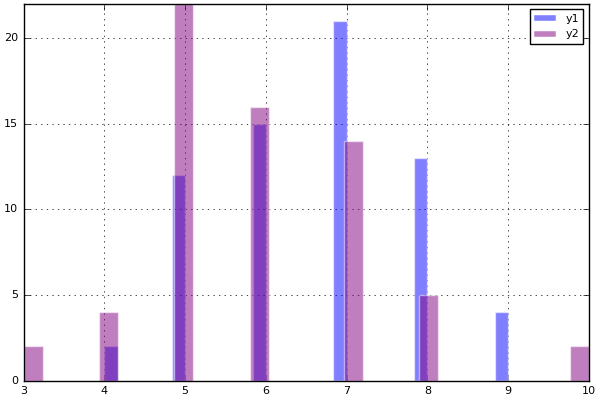

In [38]:
stagec = dataset("rpart", "stagec")

# get row indices
tetra_idx = find(stagec[:Ploidy] .== "tetraploid");
dip_idx = find(stagec[:Ploidy] .== "diploid");

# get Gleason scores
tetra_grp = stagec[tetra_idx, :Gleason];
dip_grp = stagec[dip_idx, :Gleason];


histogram(dropna(tetra_grp), line = "white", color = "blue", alpha = 0.5)
histogram!(dropna(dip_grp), line = "white", color = "purple", alpha = 0.5)

## Question 4

A key assumption of inference with linear regression is the normality of error terms. A simple but effective way to check this assumption is to examine a plot of the distribution of the fitted model's residual.
Create a plot to check the assumption of normality of error terms for model fm3 above.

In [2]:
using Plots
using GLM
using RDatasets

pyplot()

stagec = dataset("rpart", "stagec")


INFO: Recompiling stale cache file /Users/pstey/.julia/lib/v0.5/FixedSizeArrays.ji for module FixedSizeArrays.
INFO: Recompiling stale cache file /Users/pstey/.julia/lib/v0.5/PlotUtils.ji for module PlotUtils.
INFO: Recompiling stale cache file /Users/pstey/.julia/lib/v0.5/PlotThemes.ji for module PlotThemes.
INFO: Recompiling stale cache file /Users/pstey/.julia/lib/v0.5/Showoff.ji for module Showoff.
INFO: Recompiling stale cache file /Users/pstey/.julia/lib/v0.5/Measures.ji for module Measures.
INFO: Recompiling stale cache file /Users/pstey/.julia/lib/v0.5/GLM.ji for module GLM.
INFO: Precompiling module PyPlot.
INFO: Installing matplotlib via the Conda matplotlib package...


Fetching package metadata .........
Solving package specifications: .

Package plan for installation in environment /Users/pstey/.julia/v0.5/Conda/deps/usr:

The following NEW packages will be INSTALLED:

    cycler:          0.10.0-py27_0    
    freetype:        2.5.5-2          
    functools32:     3.2.3.2-py27_0   
    icu:             54.1-0           
    libpng:          1.6.27-0         
    matplotlib:      2.0.0-np112py27_0
    pyparsing:       2.1.4-py27_0     
    pyqt:            5.6.0-py27_2     
    python-dateutil: 2.6.0-py27_0     
    pytz:            2016.10-py27_0   
    qt:              5.6.2-0          
    sip:             4.18-py27_0      
    subprocess32:    3.2.7-py27_0     

The following packages will be UPDATED:

    conda:           4.3.13-py27_0     --> 4.3.14-py27_0

icu-54.1-0.tar 100% |###############################| Time: 0:00:00  11.52 MB/s
libpng-1.6.27- 100% |###############################| Time: 0:00:00  12.62 MB/s
qt-5.6.2-0.tar 100% |#######

INFO: Recompiling stale cache file /Users/pstey/.julia/lib/v0.5/RData.ji for module RData.


,PgTime,PgStat,Age,EET,G2,Grade,Gleason,Ploidy
1,6.1,0,64,2,10.26,2,4,diploid
2,9.4,0,62,1,NA,3,8,aneuploid
3,5.2,1,59,2,9.99,3,7,diploid
4,3.2,1,62,2,3.57,2,4,diploid
5,1.9,1,64,2,22.56,4,8,tetraploid
6,4.8,0,69,1,6.14,3,7,diploid
7,5.8,0,75,2,13.69,2,NA,tetraploid
8,7.3,0,71,2,NA,3,7,aneuploid
9,3.7,1,73,2,11.77,3,6,diploid
10,15.9,0,64,2,27.27,3,7,tetraploid


In [4]:
fm3 = lm(G2 ~ 1 + Age + Gleason + Grade, stagec)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredQR{Float64}},Array{Float64,2}}

Formula: G2 ~ 1 + Age + Gleason + Grade

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -9.19135   8.15383 -1.12724   0.2617
Age          0.178597  0.117116  1.52496   0.1297
Gleason       1.76439  0.872139  2.02306   0.0451
Grade        0.472942   1.99455 0.237116   0.8129


In [5]:
resid = residuals(fm3)

136-element Array{Float64,1}:
   0.0177294
  -5.1254   
  -6.31508  
   4.31429  
 -10.7614   
  -4.08136  
  11.2616   
   3.15302  
  -2.35413  
  -8.62435  
   1.35316  
   1.42443  
  -8.44874  
   ⋮        
  -3.4254   
   1.80089  
   0.288953 
 -12.7842   
   2.16755  
  -2.10368  
  -2.09382  
  -4.93119  
  -6.68806  
  25.3025   
  -2.33224  
  -5.56961  


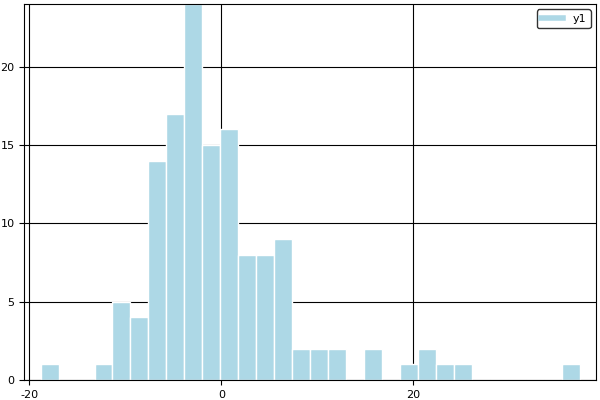

sys:1: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


In [6]:
histogram(resid, line = "white", color = "lightblue")

---

## Question 5

In [9]:
using RDatasets
using DecisionTree

aldh2 = dataset("gap", "aldh2");


Use "Dict(a=>b for (a,b) in c)" instead.


In [10]:
# must convert to Array
y = convert(Array{Float64,1}, aldh2[:Y])
X = convert(Array{Float64,2}, aldh2[:, 3:end])

# fit model
fm10 = build_forest(y, X, 2, 100)

Ensemble of Decision Trees
Trees:      100
Avg Leaves: 58.04
Avg Depth:  13.33

In [11]:
# get prediction accuracy
yhat_bool = apply_forest(fm10, X) .> 0.5
ybool = y .== 1
mean(ybool .== yhat_bool)

0.9695817490494296